# <center>Segmentação de Consumidores Para Campanhas Customizadas de Marketing</center>

<br><br>

---

<br>


# 📊 Descrição Geral
Este projeto tem como objetivo **segmentar clientes** com base em **características demográficas e comportamentais**, utilizando **análise de dados** e técnicas de **clustering**. O intuito é identificar grupos de consumidores com comportamentos e atributos semelhantes, para criar **campanhas personalizadas de marketing**. A segmentação eficaz contribui para aumentar a **satisfação do cliente**, otimizar recursos e melhorar a **performance das campanhas**.

---

# 🎯 Objetivo
O objetivo principal deste projeto é realizar a **segmentação dos clientes** para **campanhas de marketing mais assertivas**. Com a aplicação de técnicas como análise exploratória de dados e **K-means clustering**, serão formados grupos de clientes com características semelhantes, como:
- **Faixa etária**
- **Salário mensal**
- **Pontuação de gasto**

Essa segmentação permitirá o desenvolvimento de **campanhas mais personalizadas** e eficientes.

---

# 📅 Sobre o Dataset
O dataset utilizado contém informações de **200 clientes**, com **5 variáveis**:

- **IDCliente**: Identificação única de cada cliente
- **Sexo**: Gênero do cliente
- **Idade**: Faixa etária do cliente
- **Salario_Mensal_Milhar**: Salário mensal do cliente, em milhares de unidades monetárias
- **Pontuacao_Gasto**: Pontuação baseada no histórico de gastos do cliente

<br><br>

---

<br>

# 🔄 Fluxograma do Projeto

<br>

## 1. **Carregamento dos Dados**
- Leitura do arquivo **CSV** contendo as informações dos clientes.

---

## 2. **Análise Exploratória de Dados (EDA)**
- Análise do tipo de dado e **estatísticas descritivas**.
- Criação de **visualizações** para entender distribuições, como **histograma** e **boxplot**.

---

## 3. **Pré-processamento dos Dados**
- **Exclusão de colunas irrelevantes** para a análise (**IDCliente** e **Sexo**).
- **Padronização dos dados** utilizando a técnica **StandardScaler** para tornar as variáveis comparáveis.

---

## 4. **Avaliação de Tendência de Cluster**
- Aplicação de **testes** como a **Estatística Hopkins** para verificar se o dataset é propenso à clusterização.

---

## 5. **Determinação do Número de Clusters**
- Uso do método **Elbow** para determinar o número ideal de clusters com base na **WCSS** (Within-cluster sum of squares).

---

## 6. **Aplicação do Algoritmo K-means**
- **Clusterização** com o algoritmo **K-means** para dividir os dados em clusters.
- Análise dos **resultados** e **interpretação dos clusters** gerados.

---

## 7. **Visualização e Análise dos Clusters**
- **Visualizações** como gráficos de dispersão e **PCA** (Principal Component Analysis) para representar os clusters de maneira mais intuitiva.

---

## 8. **Resultados**
- Obtenção de **insights** sobre as médias de **idade**, **salário** e **pontuação de gasto** por cluster.

---

Esse fluxo vai guiar todo o processo de segmentação dos clientes, desde o carregamento dos dados até a análise dos resultados dos clusters gerados.

<br><br><br>

---

<br><br>

# 1. **Carregamento dos Dados**
- Leitura do arquivo **CSV** contendo as informações dos clientes.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv("dados/dados_clientes.csv")

# Exibir as primeiras linhas do dataset
display(df.head())

,IDCliente,Sexo,Idade,Salario_Mensal_Milhar,Pontuacao_Gasto
0,1,Masculino,19,15,39
1,2,Masculino,21,15,81
2,3,Feminino,20,16,6
3,4,Feminino,23,16,77
4,5,Feminino,31,17,40


<br>

# 2. **Análise Exploratória de Dados (EDA)**
- Análise do tipo de dado e **estatísticas descritivas**.
- Criação de **visualizações** para entender distribuições, como **histograma** e **boxplot**.

<br>

### Info

In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   IDCliente              200 non-null    int64 
 1   Sexo                   200 non-null    object
 2   Idade                  200 non-null    int64 
 3   Salario_Mensal_Milhar  200 non-null    int64 
 4   Pontuacao_Gasto        200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<br>

### Proporção do Sexo dos Clientes

/tmp/ipykernel_911523/1006109742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tabela_sexos.index, y=tabela_sexos.values, palette='coolwarm')


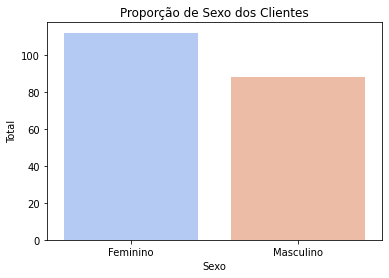

In [6]:
# Tabela de proporção do sexo dos clientes
tabela_sexos = df['Sexo'].value_counts()

# Plotando a proporção do sexo
plt.figure(figsize=(6, 4))
sns.barplot(x=tabela_sexos.index, y=tabela_sexos.values, palette='coolwarm')
plt.title('Proporção de Sexo dos Clientes')
plt.xlabel('Sexo')
plt.ylabel('Total')
plt.show()

<br>

### Distribuição das Idades

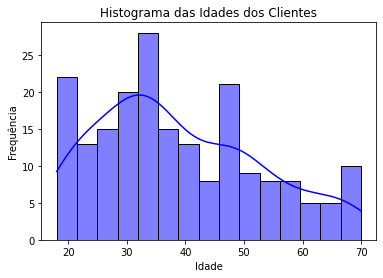

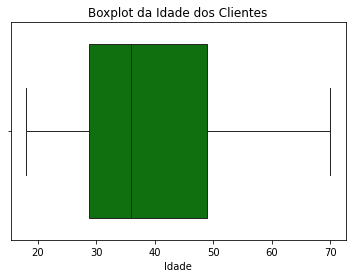

In [7]:
# Histogramas e Boxplot da Idade
plt.figure(figsize=(6, 4))
sns.histplot(df['Idade'], kde=True, color='blue', bins=15)
plt.title('Histograma das Idades dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Idade'], color='green')
plt.title('Boxplot da Idade dos Clientes')
plt.show()

<br>

### Distribuição de Salário Mensal

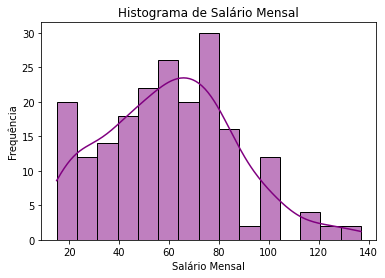

In [8]:
# Histograma de Salário
plt.figure(figsize=(6, 4))
sns.histplot(df['Salario_Mensal_Milhar'], kde=True, color='purple', bins=15)
plt.title('Histograma de Salário Mensal')
plt.xlabel('Salário Mensal')
plt.ylabel('Frequência')
plt.show()

<br>

### Análise da Pontuação de Gasto

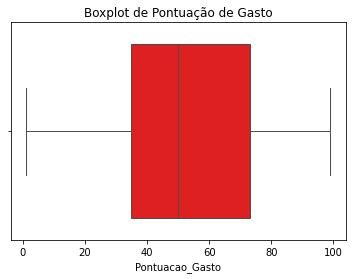

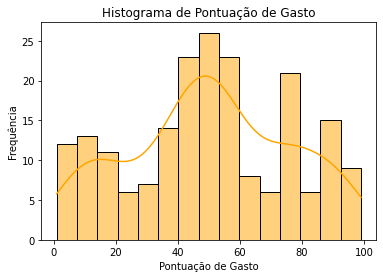

In [9]:
# Boxplot e Histograma de Pontuação de Gasto
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Pontuacao_Gasto'], color='red')
plt.title('Boxplot de Pontuação de Gasto')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['Pontuacao_Gasto'], kde=True, color='orange', bins=15)
plt.title('Histograma de Pontuação de Gasto')
plt.xlabel('Pontuação de Gasto')
plt.ylabel('Frequência')
plt.show()

<br>

# 3. **Pré-processamento dos Dados**
- **Exclusão de colunas irrelevantes** para a análise (**IDCliente** e **Sexo**).
- **Padronização dos dados** utilizando a técnica **StandardScaler** para tornar as variáveis comparáveis.

In [10]:
# Remover a coluna 'IDCliente' e 'Sexo' para análise de cluster
df_v2 = df.drop(columns=['IDCliente', 'Sexo'])

# Padronização dos dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_v2_scaled = scaler.fit_transform(df_v2)

In [14]:
df_v2_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

<br>

# 4. **Avaliação de Tendência de Cluster**
- Aplicação de **testes** como a **Estatística Hopkins** para verificar se o dataset é propenso à clusterização.

In [15]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Função para calcular a estatística Hopkins
def hopkins_statistic(X):
    n = X.shape[0]
    m = int(0.1 * n)  # 10% das amostras

    # Selecionando m amostras aleatórias
    X_rand = X[np.random.choice(n, m, replace=False), :]

    # Calculando a distância entre as amostras
    nn = NearestNeighbors(n_neighbors=2)
    nn.fit(X)
    dist_real, _ = nn.kneighbors(X_rand)

    nn.fit(X_rand)
    dist_rand, _ = nn.kneighbors(X)

    return np.sum(dist_real[:, 1]) / np.sum(dist_rand[:, 1])

# Calculando a estatística Hopkins
hopkins = hopkins_statistic(df_v2_scaled)
print(f"Estatística Hopkins: {hopkins}")

Estatística Hopkins: 0.027496369350990348


### 🧑‍💻 Objetivo da Estatística Hopkins

A **Estatística Hopkins** é uma ferramenta estatística usada para **avaliar a tendência de clusterização** de um conjunto de dados. Ela ajuda a determinar se o conjunto de dados é **"clusterizável"** (ou seja, se ele tem uma estrutura natural de agrupamentos) ou se os dados são distribuídos **aleatoriamente**.

---

### Interpretação dos Valores da Estatística Hopkins:
- **Valor próximo de 1**: Indica que os dados têm uma **estrutura de clusters bem definida**.
- **Valor próximo de 0**: Sugere que os dados são distribuídos de forma **aleatória** (ou seja, **não são "clusterizáveis"**).
- **Valor entre 0 e 1**: Sugere **algum nível de estrutura de agrupamento**, mas com **alguma dispersão**.

<br><br>

# 5. **Determinação do Número de Clusters**
- Uso do método **Elbow** para determinar o número ideal de clusters com base na **WCSS** (Within-cluster sum of squares).

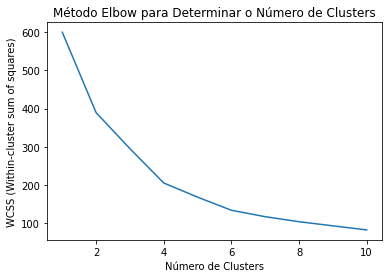

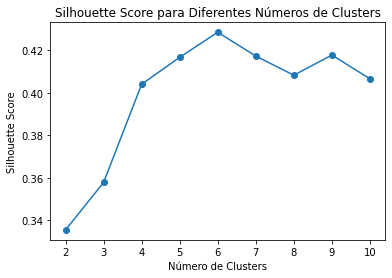

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Método Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_v2_scaled)
    wcss.append(kmeans.inertia_)

# Calculando o Silhouette Score para diferentes números de clusters
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_v2_scaled)
    sil_score = silhouette_score(df_v2_scaled, kmeans.labels_)
    sil_scores.append(sil_score)

# Plotando o gráfico Elbow
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

# Plotando o Silhouette Score
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score para Diferentes Números de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Determinação do Número Ideal de Clusters

Foram utilizadas **duas abordagens** para determinar o número ideal de clusters para o conjunto de dados.

#### 1. **Método Elbow**
O **Método Elbow** foi aplicado para calcular a soma das distâncias quadradas dentro dos clusters (**WCSS**) para diferentes números de clusters (de 1 a 10). 

- O gráfico gerado mostra o **ponto de inflexão**, onde a redução no **WCSS** diminui significativamente.
- Esse ponto é considerado o **número ideal de clusters**.

### 2. **Silhouette Score**
O **Silhouette Score** foi calculado para cada número de clusters (de 2 a 10). Esse índice mede a **qualidade da clusterização**, onde:
- Valores próximos de **1** indicam **boa separação** entre os clusters.
- Valores próximos de **-1** indicam **clusters mal formados**.

- O gráfico gerado ajuda a visualizar qual número de clusters resulta no **melhor desempenho**, baseado na **métrica de silhueta**.


<br><br>

# 6. **Aplicação do Algoritmo K-means**
- **Clusterização** com o algoritmo **K-means** para dividir os dados em clusters.
- Análise dos **resultados** e **interpretação dos clusters** gerados.
- Foi escolhido **4** o número de Clusters.

In [21]:
# Aplicando K-Means com df_v2_scaled (dados já padronizados)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(df_v2_scaled)

# Adicionando os clusters ao dataframe original
df_v2['Cluster'] = clusters

# Verificando a média por cluster (somente colunas numéricas)
mean_values = df_v2.groupby('Cluster').mean()
display(mean_values)


,Idade,Salario_Mensal_Milhar,Pontuacao_Gasto
Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


In [22]:
# Tamanho de cada cluster
cluster_sizes = df_v2['Cluster'].value_counts()
print(cluster_sizes)

Cluster
0    65
2    57
1    40
3    38
Name: count, dtype: int64


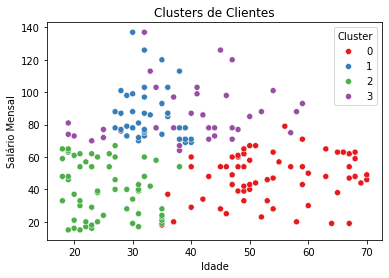

In [23]:
# Visualizando os clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_v2['Idade'], y=df_v2['Salario_Mensal_Milhar'], hue=df_v2['Cluster'], palette='Set1')
plt.title('Clusters de Clientes')
plt.xlabel('Idade')
plt.ylabel('Salário Mensal')
plt.show()

<br>

# 7. **Visualização e Análise dos Clusters**
- **Visualizações** como gráficos de dispersão e **PCA** (Principal Component Analysis) para representar os clusters de maneira mais intuitiva.


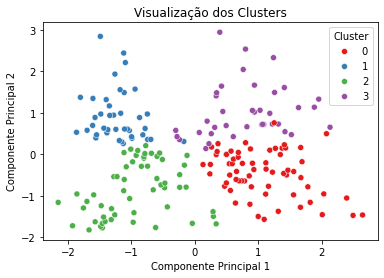

In [24]:
# Visualização dos Clusters com PCA (para redução de dimensionalidade)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_v2_scaled)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='Set1')
plt.title('Visualização dos Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

<br><br>

---

<br>

# 📊 **Resultados**

Com base na análise dos clusters gerados utilizando o algoritmo **K-Means** e a redução de dimensionalidade com **PCA**, podemos observar os seguintes **insights** a partir dos gráficos e das **médias por cluster**:

---

## 🧑‍💼 **Média por Cluster**:

### **Cluster 0**:
- **Idade**: 53.98 anos
- **Salário Mensal**: 47.71 mil unidades monetárias
- **Pontuação de Gasto**: 39.97
- **Descrição**: Este grupo é composto por **clientes de faixa etária mais alta**, com **salários médios mais baixos** e **pontuação de gasto moderada**.

### **Cluster 1**:
- **Idade**: 32.88 anos
- **Salário Mensal**: 86.10 mil unidades monetárias
- **Pontuação de Gasto**: 81.53
- **Descrição**: **Clientes com idade média jovem**, **salário elevado** e **alta pontuação de gasto**, indicando um grupo com **alto poder aquisitivo** e **frequência de compras**.

### **Cluster 2**:
- **Idade**: 25.44 anos
- **Salário Mensal**: 40.00 mil unidades monetárias
- **Pontuação de Gasto**: 60.30
- **Descrição**: Este cluster apresenta **clientes jovens**, com **salário médio mais baixo** e **pontuação de gasto média**. Pode representar um grupo de consumidores em **fase de crescimento profissional** ou **estudantes**.

### **Cluster 3**:
- **Idade**: 39.37 anos
- **Salário Mensal**: 86.50 mil unidades monetárias
- **Pontuação de Gasto**: 19.58
- **Descrição**: Com **idade média média** e **salário elevado**, mas **baixa pontuação de gasto**, pode representar **clientes com bom rendimento**, mas que não são **frequentes** ou não fazem compras de alto valor.

---

## 📊 **Tamanho dos Clusters**:
- **Cluster 0**: 65 clientes
- **Cluster 2**: 57 clientes
- **Cluster 1**: 40 clientes
- **Cluster 3**: 38 clientes

🔹 **Clusters 0 e 2** são os mais representativos em termos de **tamanho**, o que sugere que esses grupos podem ser os mais predominantes entre os clientes analisados.

---

## 📈 **Visualizações**:

### **Gráfico de Dispersão (Idade vs. Salário Mensal)**:
- O gráfico mostra uma **boa separação entre os clusters** no espaço bidimensional, onde cada grupo está claramente distinto com base em suas **características principais** (Idade e Salário Mensal).

### **Visualização com PCA**:
- A redução de dimensionalidade com **PCA** permite visualizar a **separação** entre os clusters em um espaço de 2 dimensões. Os clusters são **bem distribuídos** e formam grupos distintos, o que sugere que as características dos clientes permitem uma **segmentação eficaz**.

---

## 📝 **Conclusão**:
A segmentação realizada revelou **quatro grupos distintos de clientes** com diferentes **perfis de idade**, **salário** e **comportamento de gasto**. Esses clusters podem ser usados para criar **campanhas de marketing direcionadas**, com foco em diferentes **faixas etárias** e **níveis de poder aquisitivo**, ajudando a empresa a **personalizar suas estratégias** e **melhorar a eficiência das campanhas**.
